# **Final Project - Part B**

IST340 Knowledge Discovery and Data Mining

Group 1: **Yuri Yu**, **Irma Covarrubias**, **Patrick Watkins**

## Load necessary libraries

In [1]:
import re
import pandas as pd 
pd.set_option('display.max_columns', None) 
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

## Working directory

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# File path set and defined to Google Drive to access all the datasets.
file_path = '/content/drive/MyDrive/IST340_Spring_Lab/'

## Load the DMABASE dataset

In [4]:
df = pd.read_csv(file_path + 'DMABASE.csv')
display(df.head(10), df.shape, df.dtypes)

,name,team,no_atbat,no_hits,no_home,no_runs,no_rbi,no_bb,yr_major,cr_atbat,cr_hits,cr_home,cr_runs,cr_rbi,cr_bb,league,division,position,no_outs,no_assts,no_error,salary,logsalar
0,"Allanson, Andy",Cleveland,293,66,1,30,29,14,1,293,66,1,30,29,14,American,East,C,446,33,20,NaN,NaN
1,"Ashby, Alan",Houston,315,81,7,24,38,39,14,3449,835,69,321,414,375,National,West,C,632,43,10,475.0,6.163315
2,"Davis, Alan",Seattle,479,130,18,66,72,76,3,1624,457,63,224,266,263,American,West,1B,880,82,14,480.0,6.173786
3,"Dawson, Andre",Montreal,496,141,20,65,78,37,11,5628,1575,225,828,838,354,National,East,RF,200,11,3,500.0,6.214608
4,"Galarraga, Andres",Montreal,321,87,10,39,42,30,2,396,101,12,48,46,33,National,East,1B,805,40,4,91.5,4.516339
5,"Griffin, Alfredo",Oakland,594,169,4,74,51,35,11,4408,1133,19,501,336,194,American,West,SS,282,421,25,750.0,6.620073
6,"Newman, Al",Montreal,185,37,1,23,8,21,2,214,42,1,30,9,24,National,East,2B,76,127,7,70.0,4.248495
7,"Salazar, Argenis",KansasCity,298,73,0,24,24,7,3,509,108,0,41,37,12,American,West,SS,121,283,9,100.0,4.605170
8,"Thomas, Andres",Atlanta,323,81,6,26,32,8,2,341,86,6,32,34,8,National,West,SS,143,290,19,75.0,4.317488
9,"Thornton, Andre",Cleveland,401,92,17,49,66,65,13,5206,1332,253,784,890,866,American,East,DH,0,0,0,1100.0,7.003065


(322, 23)

name         object
team         object
no_atbat      int64
no_hits       int64
no_home       int64
no_runs       int64
no_rbi        int64
no_bb         int64
yr_major      int64
cr_atbat      int64
cr_hits       int64
cr_home       int64
cr_runs       int64
cr_rbi        int64
cr_bb         int64
league       object
division     object
position     object
no_outs       int64
no_assts      int64
no_error      int64
salary      float64
logsalar    float64
dtype: object

# Data Understanding Phase

### Describe the DMABASE dataset

In [5]:
# Create a metadata function that shows and details a description of an input dataframe
def metadata(df):
    columns_list = list(df.columns.values)
    metadata = pd.DataFrame(columns_list, columns=['col_name'])

    # Data types
    metadata['data_type'] = [i for i in df.dtypes.astype(str)]

    # Missing values
    metadata['missing_values'] = [i for i in df.isnull().sum()]

    # Missing values percentage in two digits number
    metadata['missing_values_percentage'] = [round(i*100,2) for i in df.isnull().sum() / df.shape[0]]
    
    # Number of unique values
    metadata['unique_values'] = [i for i in df.nunique()]

    # Number of unique values percentage
    metadata['unique_values_percentage'] = [round(i*100,2) for i in df.nunique() / df.shape[0]]

    # Basic statistics for interval columns
    interval_columns = [col for col in columns_list if df[col].dtype != 'object']
    desc_interval = df[interval_columns].agg(['min', 'max', 'std']).transpose().reset_index().rename(columns={'index': 'col_name'})
    metadata = metadata.merge(desc_interval, on='col_name', how='left')

    return metadata

In [6]:
# Describe DMABASE dataset usng metadata function
display(metadata(df))

,col_name,data_type,missing_values,missing_values_percentage,unique_values,unique_values_percentage,min,max,std
0,name,object,0,0.00,322,100.00,NaN,NaN,NaN
1,team,object,0,0.00,24,7.45,NaN,NaN,NaN
2,no_atbat,int64,0,0.00,246,76.40,127.000000,687.000000,143.595835
3,no_hits,int64,0,0.00,136,42.24,31.000000,238.000000,44.179509
4,no_home,int64,0,0.00,37,11.49,0.000000,40.000000,8.698770
5,no_runs,int64,0,0.00,91,28.26,12.000000,130.000000,25.057366
6,no_rbi,int64,0,0.00,100,31.06,8.000000,121.000000,25.501162
7,no_bb,int64,0,0.00,85,26.40,3.000000,105.000000,21.095941
8,yr_major,int64,0,0.00,22,6.83,1.000000,24.000000,4.969707
9,cr_atbat,int64,0,0.00,315,97.83,166.000000,14053.000000,2328.479167


1. Since there are 322 records and 322 different names, NAME is likely a unique id, so we will most likely have to drop this column because it is useless for our analysis.
2. The dataset has 322 records and 23 variables. There are 5 categorical columns and 18 interval column.
3. Columns salary and logsalar are missing data, so these values will need to be inputed.
4. What is the timeline for this? Does career stats include 1986 stats as well?
5. What derived data can we use?  OB%, Bating AVG,
6. What variables are correlated?

### Data Exploration

In [7]:
# Create a function that will perform exploratory data analysis on a specified column in a DataFrame, displaying basic statistics and visualizations.
def data_exploration(df, column):
    col_type = df[column].dtype

    if col_type == 'object' or col_type == 'category': 
        unique_values = df[column].nunique()
        print(f"Counts and percentages of unique values in {column}:\n")
        count_pct = pd.concat([df[column].value_counts(), df[column].value_counts(normalize=True) * 100], axis=1)
        count_pct.columns = ['Count', 'Percentage']
        print(count_pct)
        if unique_values < 10:   
            plt.figure(figsize=(8, 6))
            sns.countplot(data=df, x=column)
            plt.title(f"Bar chart of {column}") # Bar plot
            plt.show()
        else:
            bins_num = df[column].nunique()
            sns.histplot(data=df, x=column, bins=bins_num, kde=True) # Histogram
            plt.title(f"Histogram of {column}")
            plt.xticks(rotation=90, fontsize=7, ha="center")
            plt.show()
    
    else:
        mean = df[column].mean() # mean
        std_dev = df[column].std() # standard deviation
        # Calculate interquartile range (IQR)
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1 # interquartile range
        outlier_range = (q1 - 1.5*iqr, q3 + 1.5*iqr) # outlier range
        outliers = df[(df[column] < outlier_range[0]) | (df[column] > outlier_range[1])]
        outliers = outliers[column].values # outlier values

        print(f"Mean of {column}: {mean:.2f}")
        print(f"Standard deviation of {column}: {std_dev:.2f}")
        print(f"Number of outliers in {column}: {len(outliers)}")
        print("Outliers values:")
        print(outliers)

        plt.figure(figsize=(8, 6))
        sns.boxplot(data=df, x=column)
        plt.title(f"Box plot of {column}") # Box plot
        plt.show()

        if df[column].nunique() >= 10:
            plt.figure(figsize=(8, 6))
            sns.histplot(data=df, x=column, bins=10, kde=True) # Histogram that has 10 bins
            plt.title(f"Histogram of {column}")
            plt.show()
        else:
            plt.figure(figsize=(8, 6))
            sns.histplot(data=df, x=column, kde=True) # Histogram
            plt.title(f"Histogram of {column}")
            plt.show()

#### Explore Categorical Variables
Perform data exploration on the categorical variables of the DMABASE dataset

Counts and percentages of unique values in name:

                   Count  Percentage
Allanson, Andy         1    0.310559
Bush, Randy            1    0.310559
Tettleton, Mickey      1    0.310559
Scioscia, Mike         1    0.310559
Schmidt, Mike          1    0.310559
...                  ...         ...
Stubbs, Franklin       1    0.310559
Rayford, Floyd         1    0.310559
Lynn, Fred             1    0.310559
Whitt, Ernie           1    0.310559
Wilson, Willie         1    0.310559

[322 rows x 2 columns]


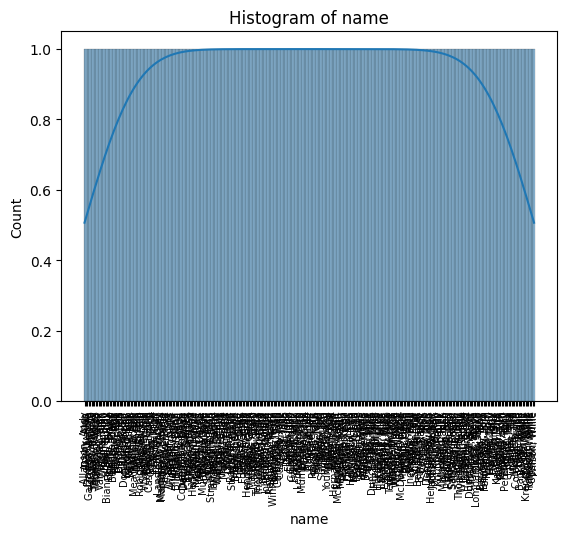

In [18]:
# Player's name
data_exploration(df, 'name')

# Definitely unique and no duplicates, so we can drop this variable.

In [19]:
df['name'].value_counts()

Allanson, Andy       1
Bush, Randy          1
Tettleton, Mickey    1
Scioscia, Mike       1
Schmidt, Mike        1
                    ..
Stubbs, Franklin     1
Rayford, Floyd       1
Lynn, Fred           1
Whitt, Ernie         1
Wilson, Willie       1
Name: name, Length: 322, dtype: int64

Counts and percentages of unique values in team:

              Count  Percentage
NewYork          24    7.453416
Chicago          24    7.453416
Baltimore        15    4.658385
Montreal         14    4.347826
Milwaukee        14    4.347826
KansasCity       14    4.347826
SanFrancisco     14    4.347826
LosAngeles       14    4.347826
Minneapolis      13    4.037267
Texas            13    4.037267
California       13    4.037267
SanDiego         13    4.037267
Cincinnati       12    3.726708
Cleveland        12    3.726708
Detroit          12    3.726708
Oakland          12    3.726708
Seattle          12    3.726708
Philadelphia     12    3.726708
Houston          11    3.416149
Pittsburgh       11    3.416149
StLouis          11    3.416149
Atlanta          11    3.416149
Toronto          11    3.416149
Boston           10    3.105590


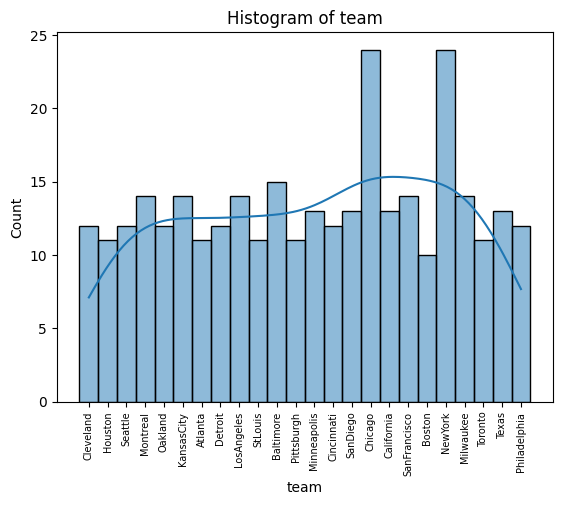

In [9]:
# Team at the end of 1986
data_exploration(df, 'team')

# Most players come from New York or Chicago; most likely because they account for 2 team each
# New York = Yankees (AL) and Mets (NL)
# Chicago = White Sox (AL) and Cubs (NL)
# The data set only includes the city not the name of the Team.
# City names are spelled consistently with no variations, so we will not have to worry about standardizing city names.

Counts and percentages of unique values in league:

          Count  Percentage
American    175   54.347826
National    147   45.652174


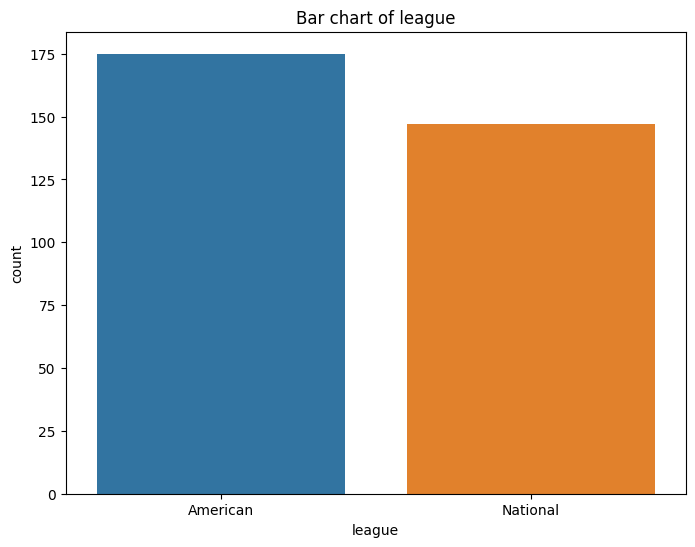

In [10]:
# League at the end of 1986
data_exploration(df, 'league')

# Most of the players play in the AL accounting for 54% (NL = 46%); the data is imbalanced.

Counts and percentages of unique values in division:

      Count  Percentage
West    165   51.242236
East    157   48.757764


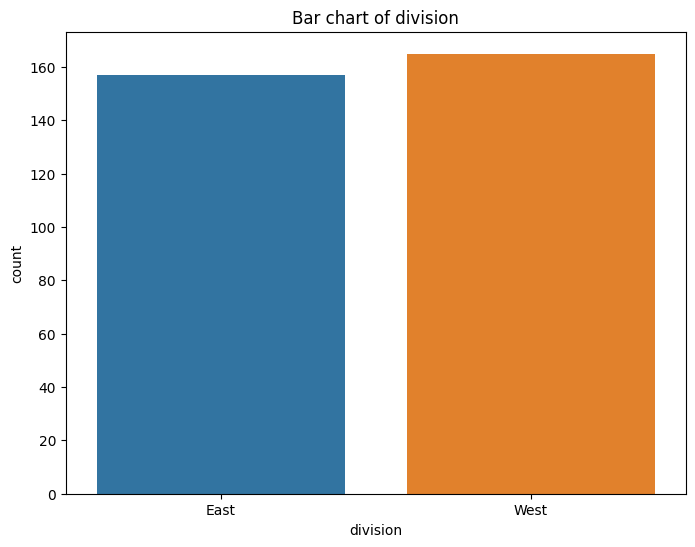

In [11]:
# Division at the end of 1986
data_exploration(df, 'division')

# Most of the players play in th west division accounting for 51% (49% in East); there is a slight imbalance by about 2%.

Counts and percentages of unique values in position:

    Count  Percentage
C      40   12.422360
3B     32    9.937888
1B     31    9.627329
2B     31    9.627329
OF     30    9.316770
SS     30    9.316770
CF     26    8.074534
RF     26    8.074534
LF     25    7.763975
DH     16    4.968944
UT     14    4.347826
O1      4    1.242236
3S      3    0.931677
OS      2    0.621118
DO      2    0.621118
32      1    0.310559
S3      1    0.310559
1O      1    0.310559
CS      1    0.310559
OD      1    0.310559
CD      1    0.310559
3O      1    0.310559
23      1    0.310559
2S      1    0.310559
13      1    0.310559


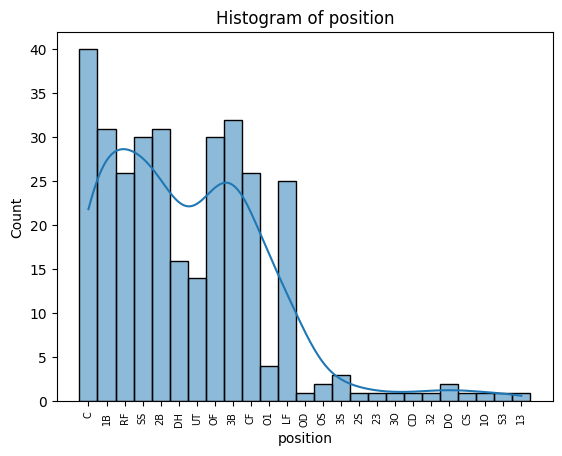

In [12]:
data_exploration(df, 'position')

# After "UT," there are some odd positions abbreviations that I've never heard of. We will either have to look these players up or need to discuss with this with professor.
# Perhaps we can also group these as "other" or something?

#### Explore Interval Variables
Perform data exploration on the interval variables of the DMABASE dataset

Mean of no_atbat: 390.07
Standard deviation of no_atbat: 143.60
Number of outliers in no_atbat: 0
Outliers values:
[]


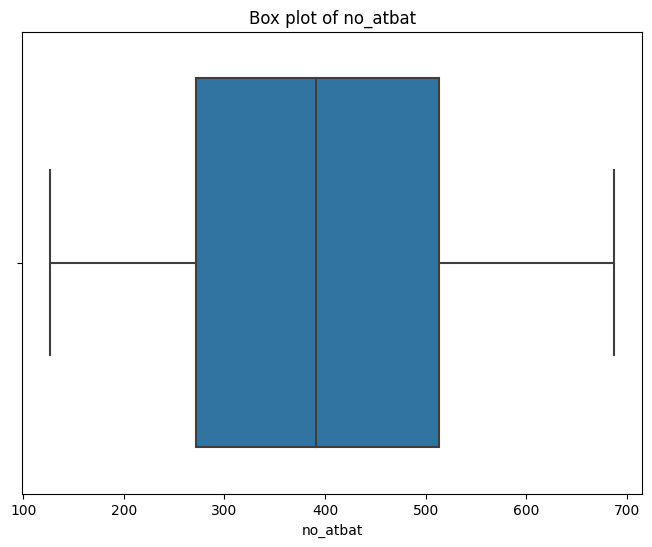

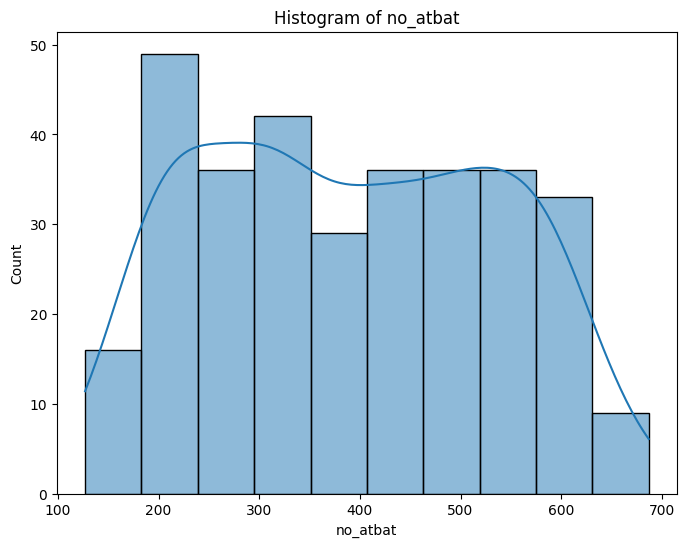

In [13]:
# Times at Bat in 1986
data_exploration(df, 'no_atbat')

# Most at bats fell between about 200-600 in 1986.
# MIN = 127
# MAX = 687

Mean of no_hits: 103.40
Standard deviation of no_hits: 44.18
Number of outliers in no_hits: 0
Outliers values:
[]


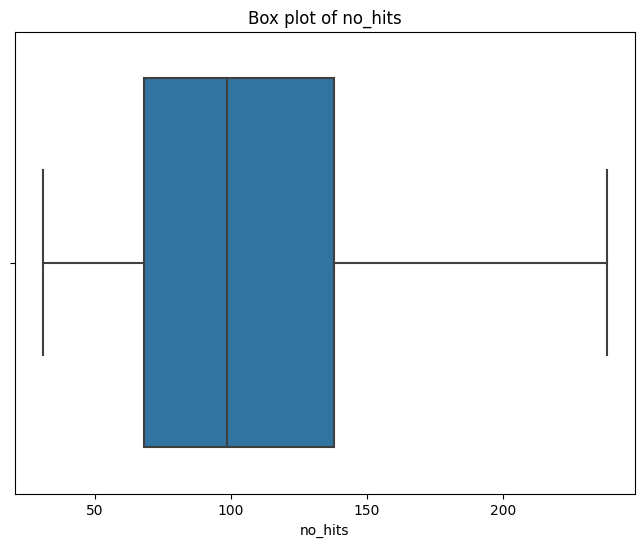

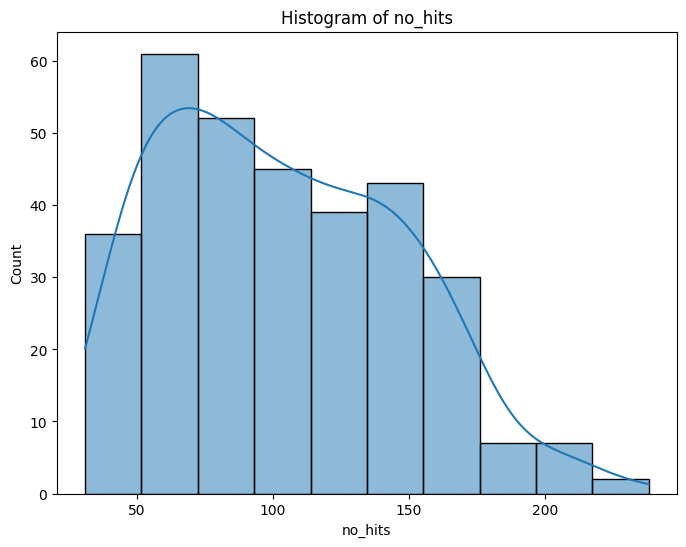

In [15]:
# Hits in 1986
data_exploration(df, 'no_hits')

# For 1986, the number of hits fell between 50-150
# Data is positively skewed
# No outliers
# MIN = 31
# MAX = 238

Mean of no_home: 11.10
Standard deviation of no_home: 8.70
Number of outliers in no_home: 3
Outliers values:
[35 40 37]


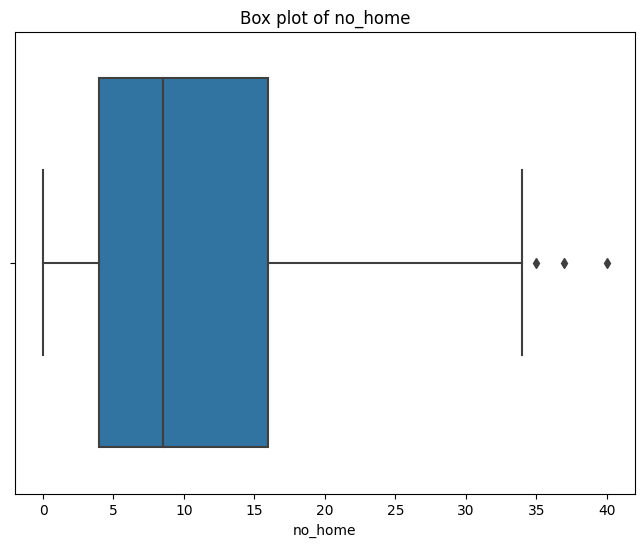

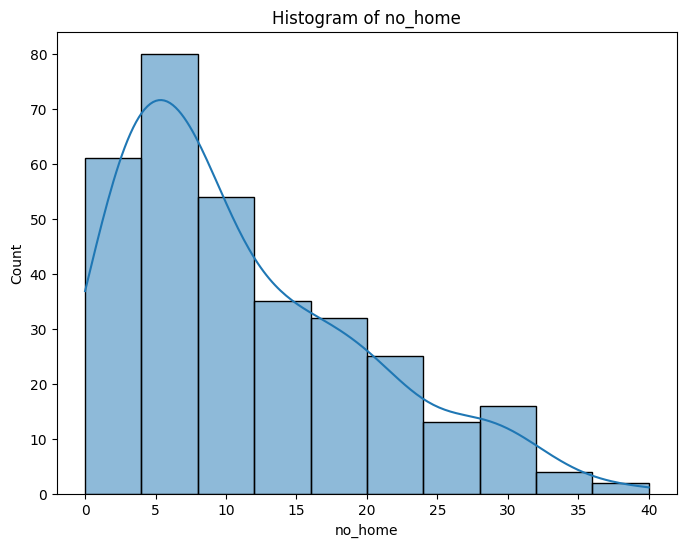

In [16]:
# Home Runs in 1986
data_exploration(df, 'no_home') 

# In 1986, total home runs fell between 0-20;
# Data is positively skewed
# There are 3 outliers = 35, 37, 40
# MIN = 0
# MAX = 40

Mean of no_runs: 52.22
Standard deviation of no_runs: 25.06
Number of outliers in no_runs: 1
Outliers values:
[130]


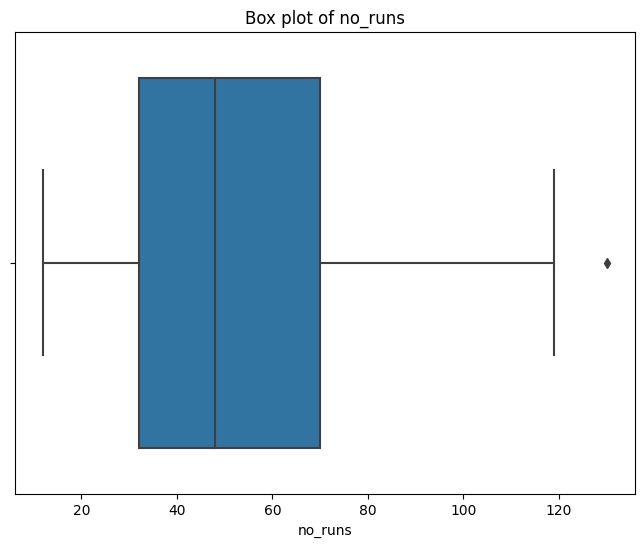

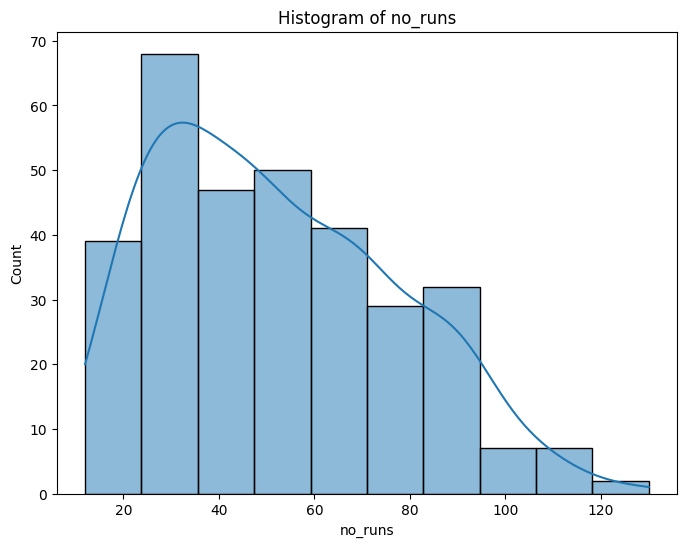

In [17]:
# Runs in 1986
data_exploration(df, 'no_runs')

# In 1986, most runs fell between 20-80 total runs.
# Data is positively skewed
# 1 outlier = 130
# MIN = 12
# MAX = 130

Mean of no_rbi: 49.37
Standard deviation of no_rbi: 25.50
Number of outliers in no_rbi: 1
Outliers values:
[121]


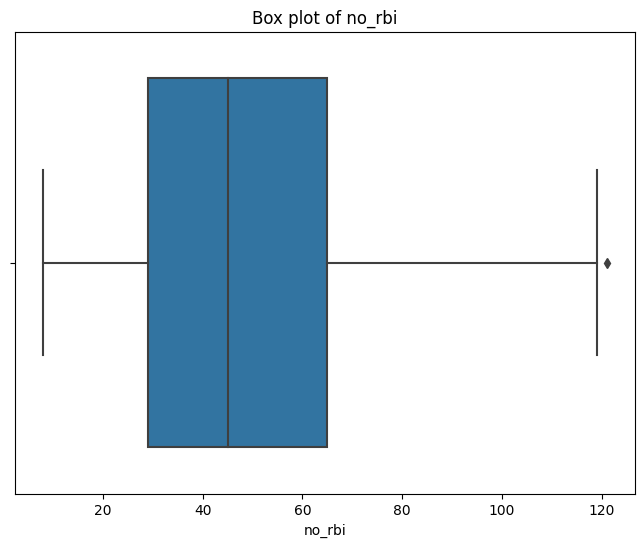

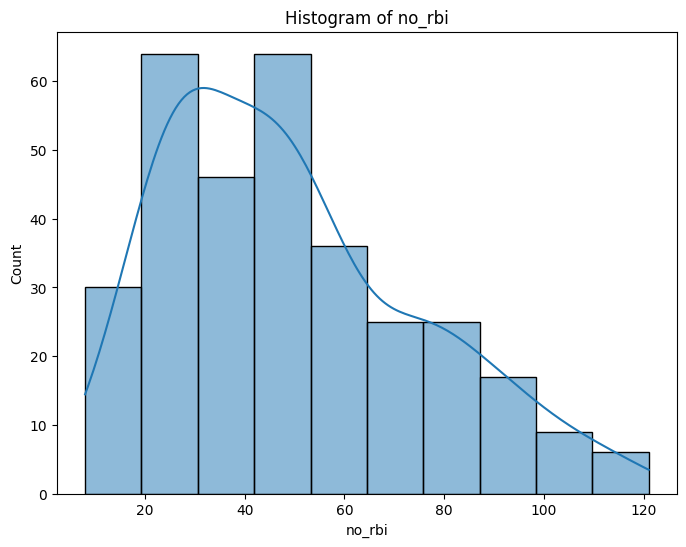

In [20]:
# RBIs in 1986
data_exploration(df, 'no_rbi')

# In 1986, most feel between 20-80 RBIs
# Data is positively skewed
# 1 outlier = 121
# MIN = 8
# MAX = 121

Mean of no_bb: 39.86
Standard deviation of no_bb: 21.10
Number of outliers in no_bb: 1
Outliers values:
[105]


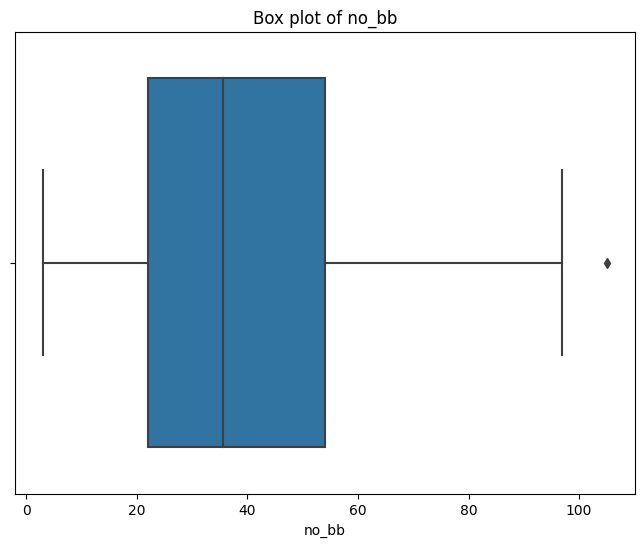

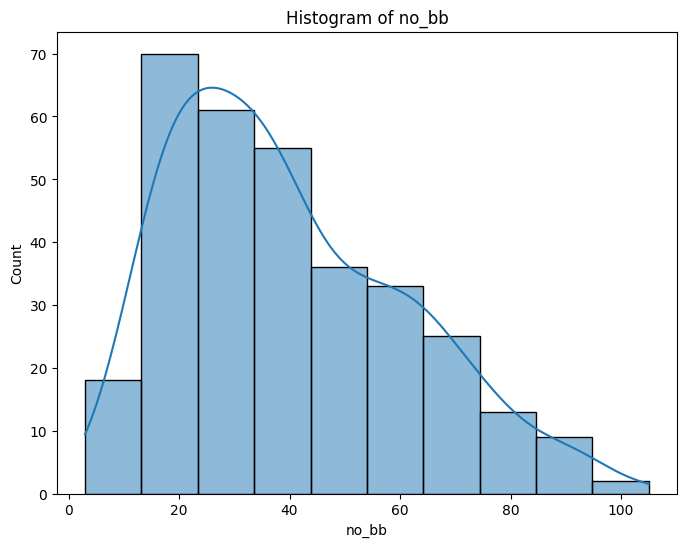

In [21]:
# Walks in 1986
data_exploration(df, 'no_bb')

# Most fell between 20-60 total walks in 1986
# Data is positively skewed
# 1 outlier = 105
# MIN = 3
# MAX = 105

Mean of yr_major: 7.68
Standard deviation of yr_major: 4.97
Number of outliers in yr_major: 2
Outliers values:
[24 23]


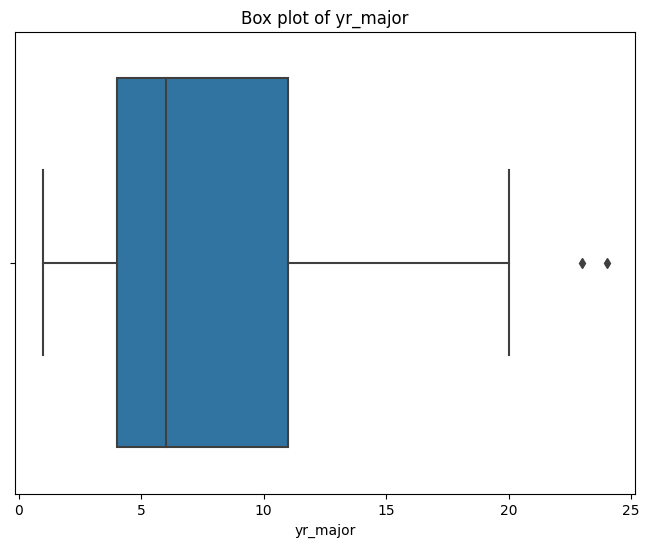

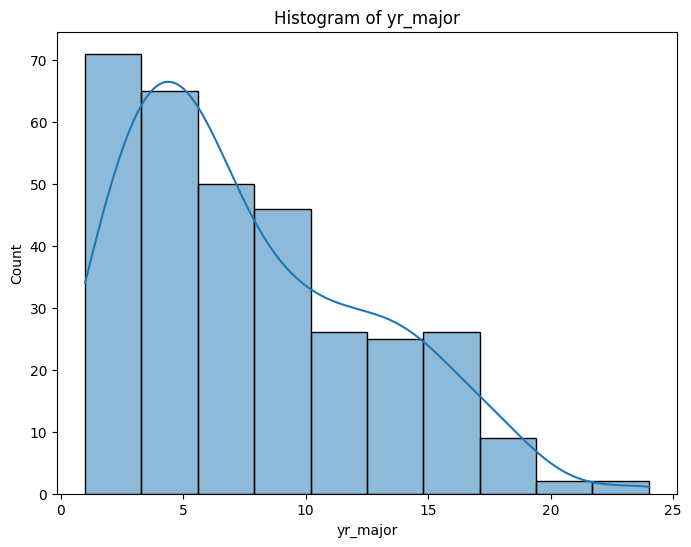

In [22]:
# Years in the Major Leagues
data_exploration(df, 'yr_major')

# MOst played between 0-15 years
# Data is positively skewed
# 2 outlier = 23, 24
# MIN = 1
# MAX = 24

Mean of cr_atbat: 2763.08
Standard deviation of cr_atbat: 2328.48
Number of outliers in cr_atbat: 3
Outliers values:
[14053  9528  9778]


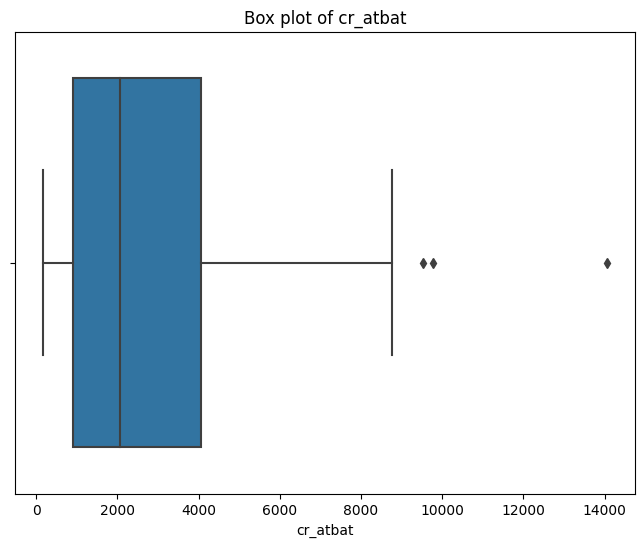

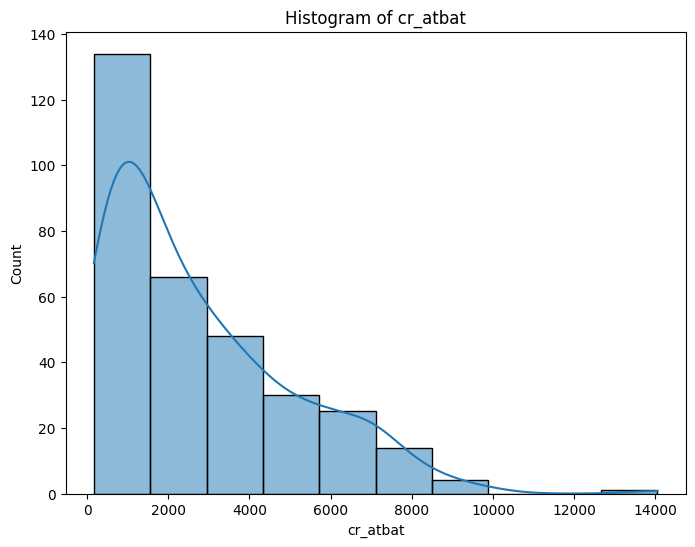

In [23]:
# Career times at bat
data_exploration(df, 'cr_atbat')

# Most players fell between 0-4000 career at-bats
# Data is positively skewed
# 3 outlier = 9528, 9778, 14053
# MIN = 166
# MAX = 14053

Mean of cr_hits: 747.69
Standard deviation of cr_hits: 654.79
Number of outliers in cr_hits: 6
Outliers values:
[2464 4256 2510 2583 2732 2402]


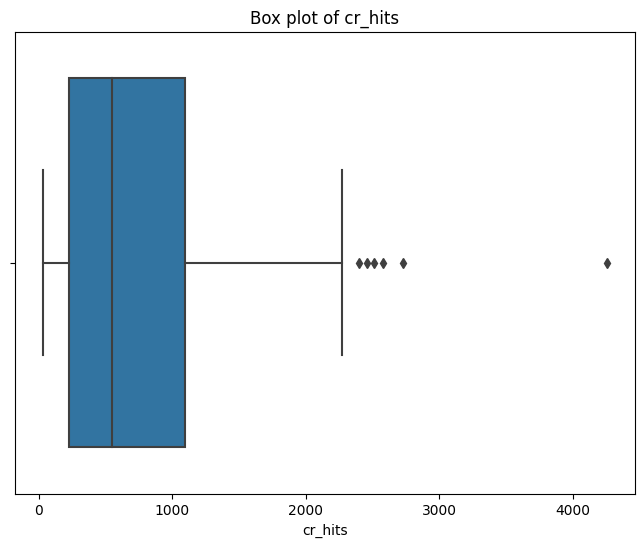

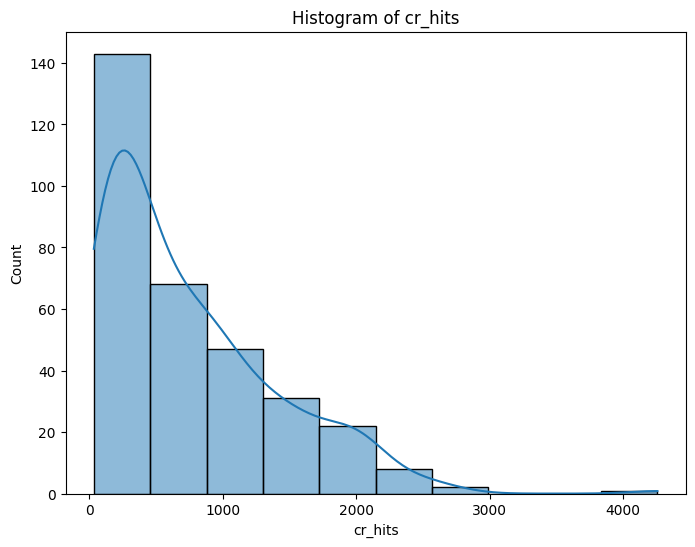

In [24]:
# Career Hits
data_exploration(df, 'cr_hits')

# Most players fell between 0 and 1000+ career hits
# Data is positively skewed
# 6 outlier = [2464 4256 2510 2583 2732 2402]
# MIN = 34
# MAX = 4256

Mean of cr_home: 74.09
Standard deviation of cr_home: 90.07
Number of outliers in cr_home: 32
Outliers values:
[225 253 224 215 235 235 281 242 315 221 347 291 442 266 247 305 275 241
 271 348 259 231 384 268 351 495 312 548 271 224 379 242]


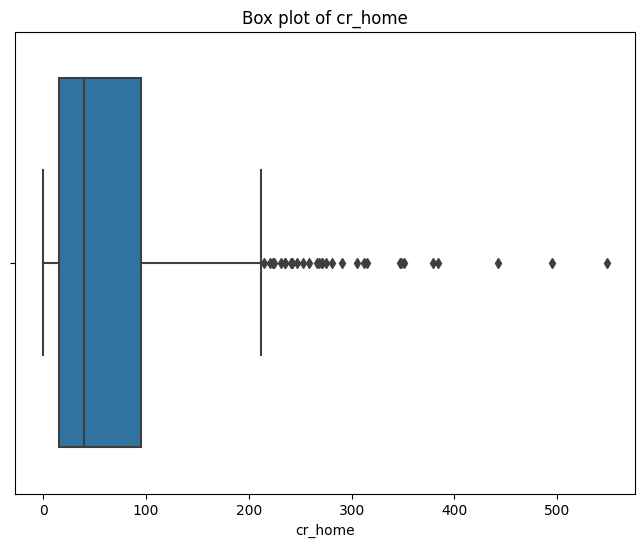

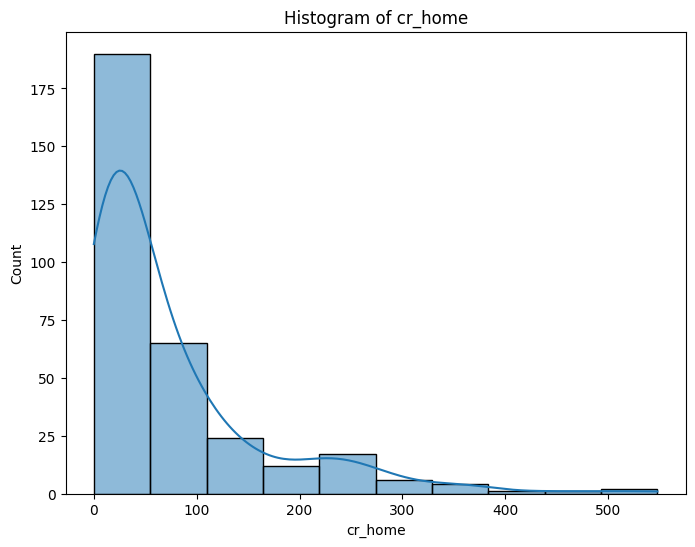

In [25]:
# Career Home Runs
data_exploration(df, 'cr_home')

# Most players fell between 0 and 100 career homers
# Data is positively skewed
# 32 outlier = [225 253 224 215 235 235 281 242 315 221 347 291 442 266 247 305 275 241 271 348 259 231 384 268 351 495 312 548 271 224 379 242]
# MIN = 0
# MAX = 548

Mean of cr_runs: 374.29
Standard deviation of cr_runs: 336.43
Number of outliers in cr_runs: 4
Outliers values:
[1347 2165 1509 1272]


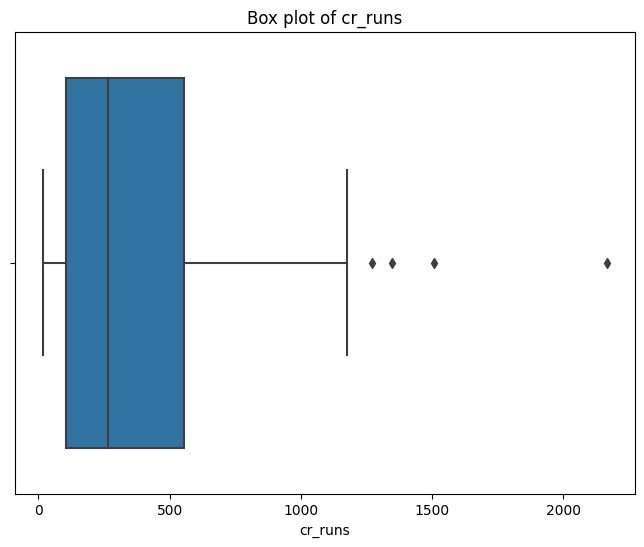

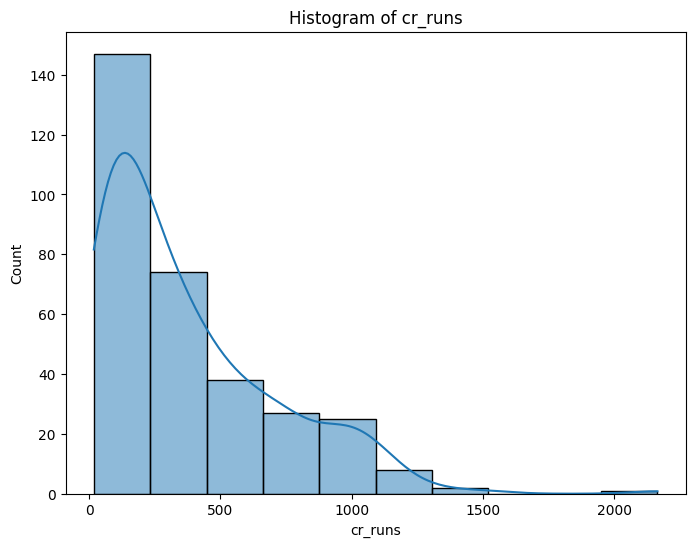

In [26]:
# Career Runs
data_exploration(df, 'cr_runs')

# Most players fell between 0 and roughly over 500 career runs
# Data is positively skewed
# 4 outlier = [1347 2165 1509 1272]
# MIN = 18
# MAX = 2165

Mean of cr_rbi: 347.61
Standard deviation of cr_rbi: 338.79
Number of outliers in cr_rbi: 23
Outliers values:
[1072 1089 1013 1179 1152 1210 1093 1234 1015 1050 1239 1067 1267 1088
 1032 1289 1392 1314 1128 1659 1299 1652 1348]


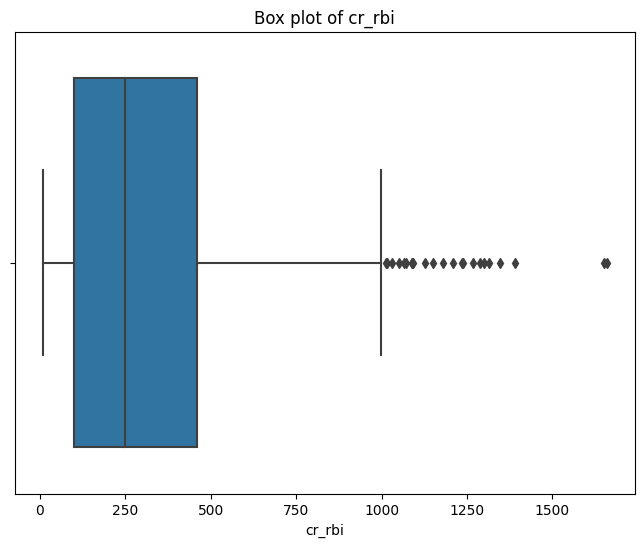

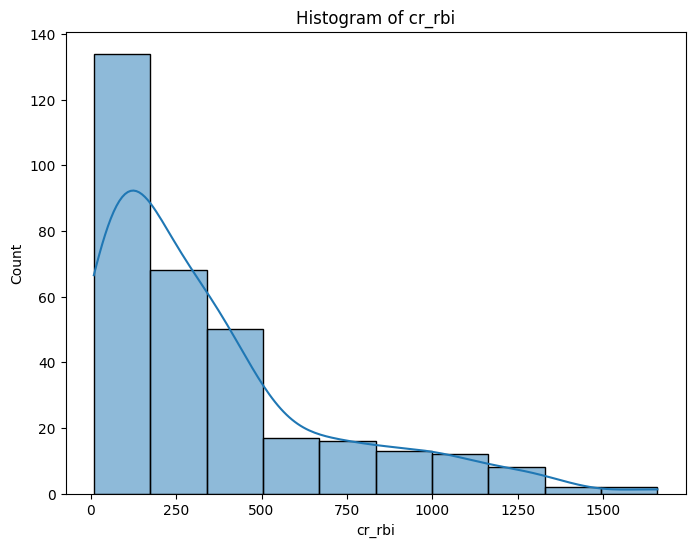

In [27]:
# Career RBIs
data_exploration(df, 'cr_rbi')

# Most players fell between 0 and 500 career RBIs
# Data is positively skewed
# 23 outlier = [1072 1089 1013 1179 1152 1210 1093 1234 1015 1050 1239 1067 1267 1088 1032 1289 1392 1314 1128 1659 1299 1652 1348]
# MIN = 9
# MAX = 1659

Mean of cr_bb: 273.39
Standard deviation of cr_bb: 273.63
Number of outliers in cr_bb: 18
Outliers values:
[ 866 1087 1380  989  820  875  921 1057  854  917 1354 1566  990 1342
 1153  925  819  875]


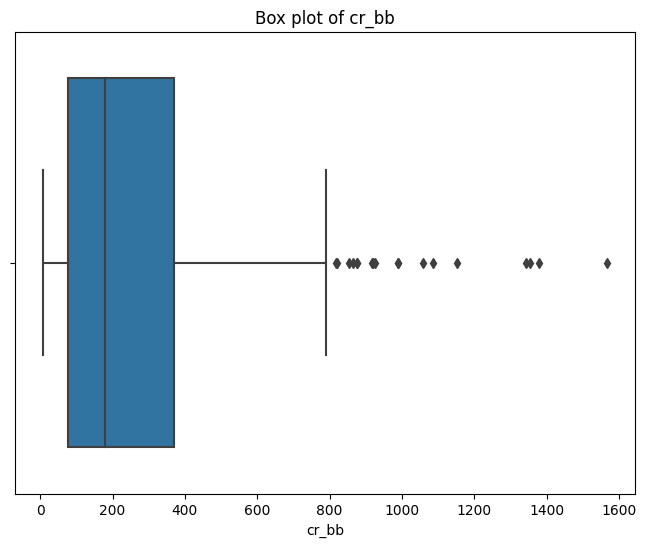

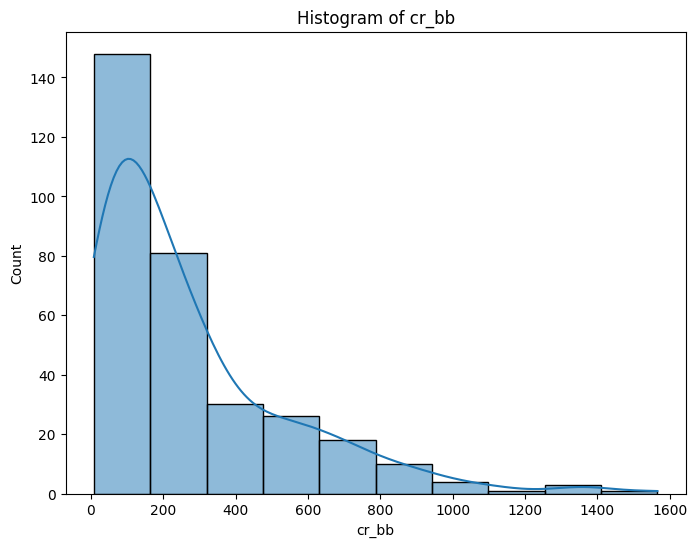

In [28]:
# Career Walks
data_exploration(df, 'cr_bb')

# Most players fell between 0 and 400 career walks
# Data is positively skewed
# 18 outlier = [ 866 1087 1380  989  820  875  921 1057  854  917 1354 1566  990 1342 1153  925  819  875]
# MIN = 8
# MAX = 1566

Mean of no_outs: 288.99
Standard deviation of no_outs: 280.66
Number of outliers in no_outs: 36
Outliers values:
[ 880  805  912  812 1067  732 1378  697  808 1377 1045  709  726  869
 1253  670  885  686 1199 1218 1231  756  682 1224  846  659  866 1236
 1320 1160  692  810 1182  942 1222 1314]


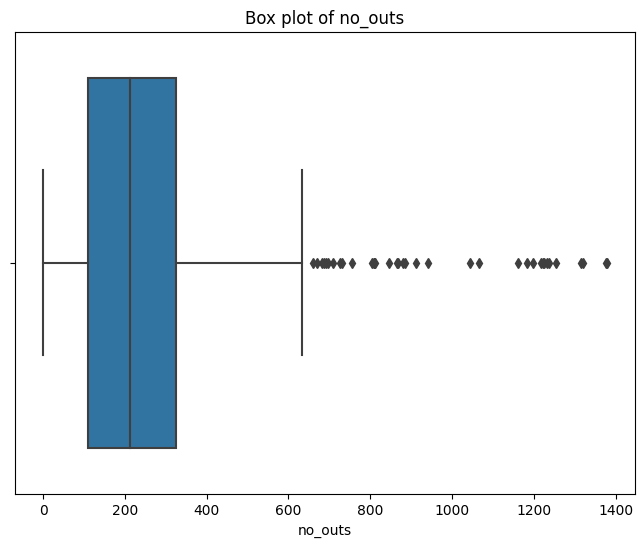

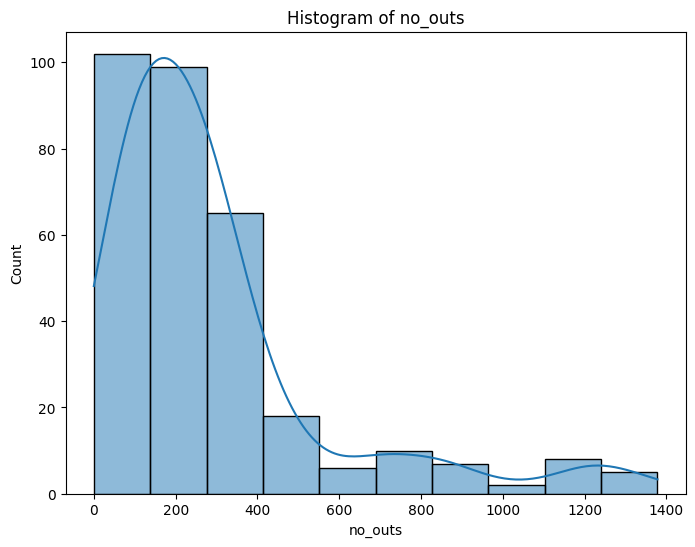

In [29]:
# Put Outs in 1986
data_exploration(df, 'no_outs')

# Most players were thrown out roughly between 0 and 400 times in 1986
# Data is positively skewed
# 36 outlier = [ 880  805  912  812 1067  732 1378  697  808 1377 1045  709  726  869 1253  670  885  686 1199 1218 1231  756  682 1224  846  659  866 1236 1320 1160  692  810 1182  942 1222 1314]
# MIN = 0
# MAX = 1378

Mean of no_assts: 106.92
Standard deviation of no_assts: 136.85
Number of outliers in no_assts: 23
Outliers values:
[421 445 482 439 487 415 479 440 444 421 450 459 453 475 492 450 465 406
 407 432 442 445 414]


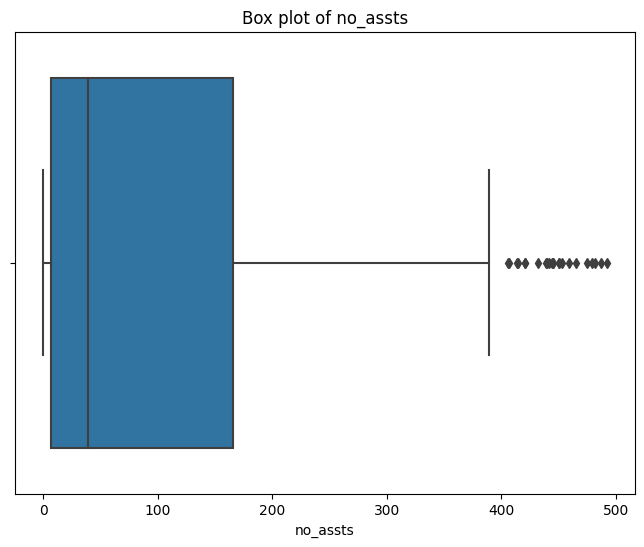

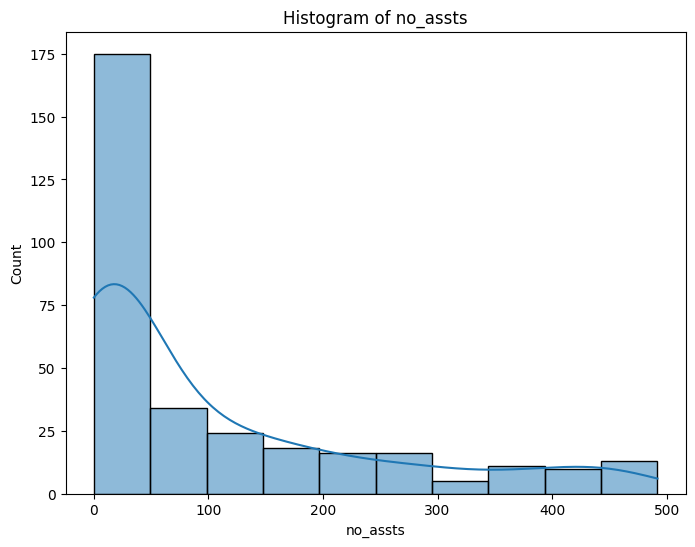

In [30]:
# Assists in 1986
data_exploration(df, 'no_assts')

# In 1986, most players fell roughly between 0 and 200 assists
# Data is positively skewed
# 23 outlier = [421 445 482 439 487 415 479 440 444 421 450 459 453 475 492 450 465 406 407 432 442 445 414]
# MIN = 0
# MAX = 492

Mean of no_error: 8.04
Standard deviation of no_error: 6.37
Number of outliers in no_error: 9
Outliers values:
[25 25 24 26 26 25 25 29 32]


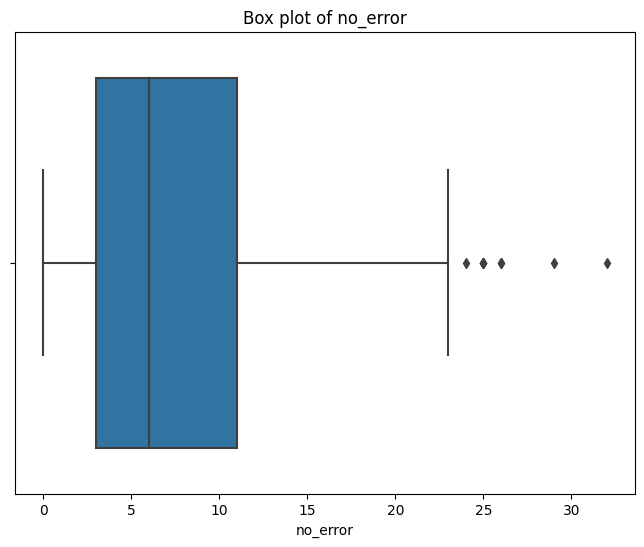

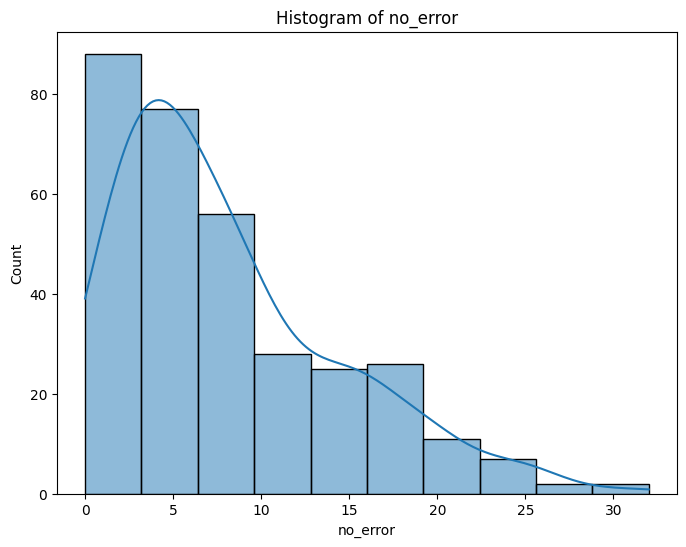

In [31]:
# Errors in 1986
data_exploration(df, 'no_error')

# In 1986, most players fell roughly between 0 and 15 errors
# Data is positively skewed
# 9 outlier = [25 25 24 26 26 25 25 29 32]
# MIN = 0
# MAX = 32

Mean of salary: 535.93
Standard deviation of salary: 451.12
Number of outliers in salary: 11
Outliers values:
[1975.    1900.    1861.46  2460.    1925.571 2412.5   1800.    2127.333
 1940.    1670.    1600.   ]


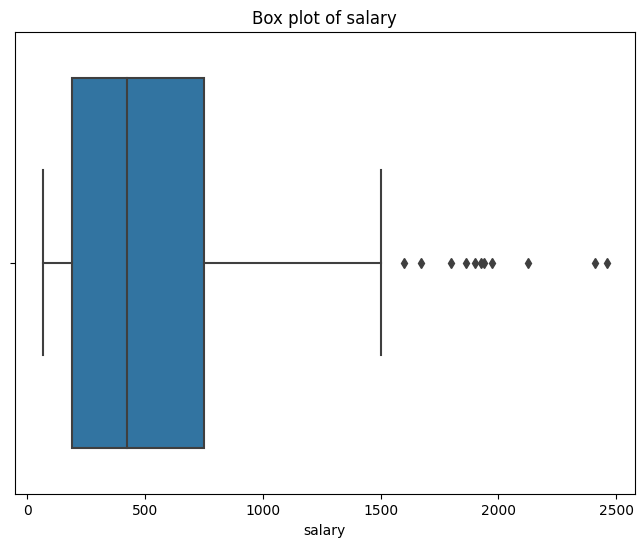

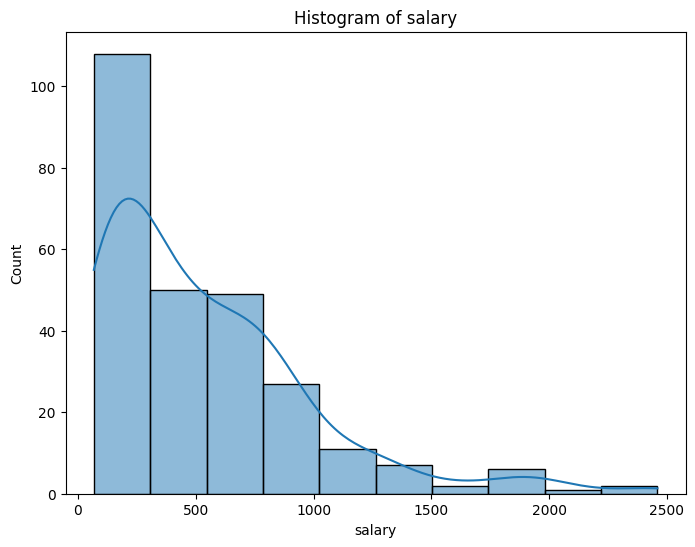

In [32]:
# 1987 Salary in $ Thousands
data_exploration(df, 'salary')

# In 1987, most player salaries fell roughly between $125 and $750 thousand
# Data is positively skewed
# 11 outlier = [1975.    1900.    1861.46  2460.    1925.571 2412.5   1800.    2127.333 1940.    1670.    1600.   ]
# MIN = 67.50
# MAX = 2460.00
# We can confirm here that we are predicting for 1987

Mean of logsalar: 5.93
Standard deviation of logsalar: 0.89
Number of outliers in logsalar: 0
Outliers values:
[]


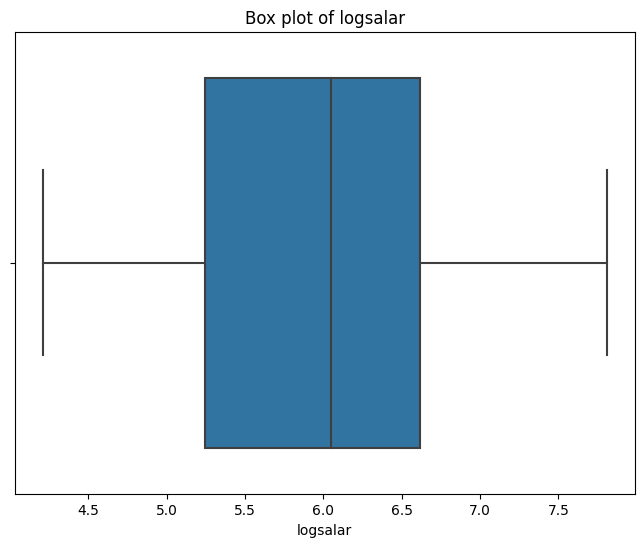

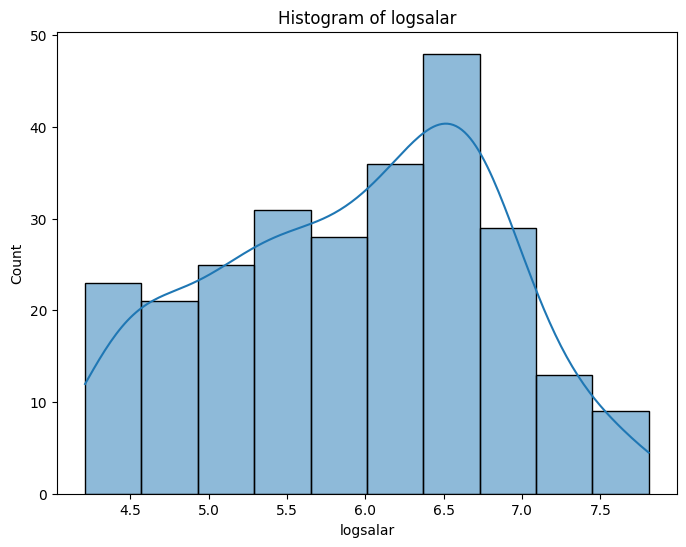

In [33]:
# Log Salary
data_exploration(df, 'logsalar')  # Target Variable

# In 1987, most player log salaries fell roughly between 5.0 and 7.0
# Data is negatively skewed
# 0 outliers
# MIN = 4.21
# MAX = 7.81

1. The logsalar is clearly dependent on the Salary field.  We need to access Dr. Li why these are missing.  Is it random?  Since the data is negatively skewed, median imputation might be the best fit?

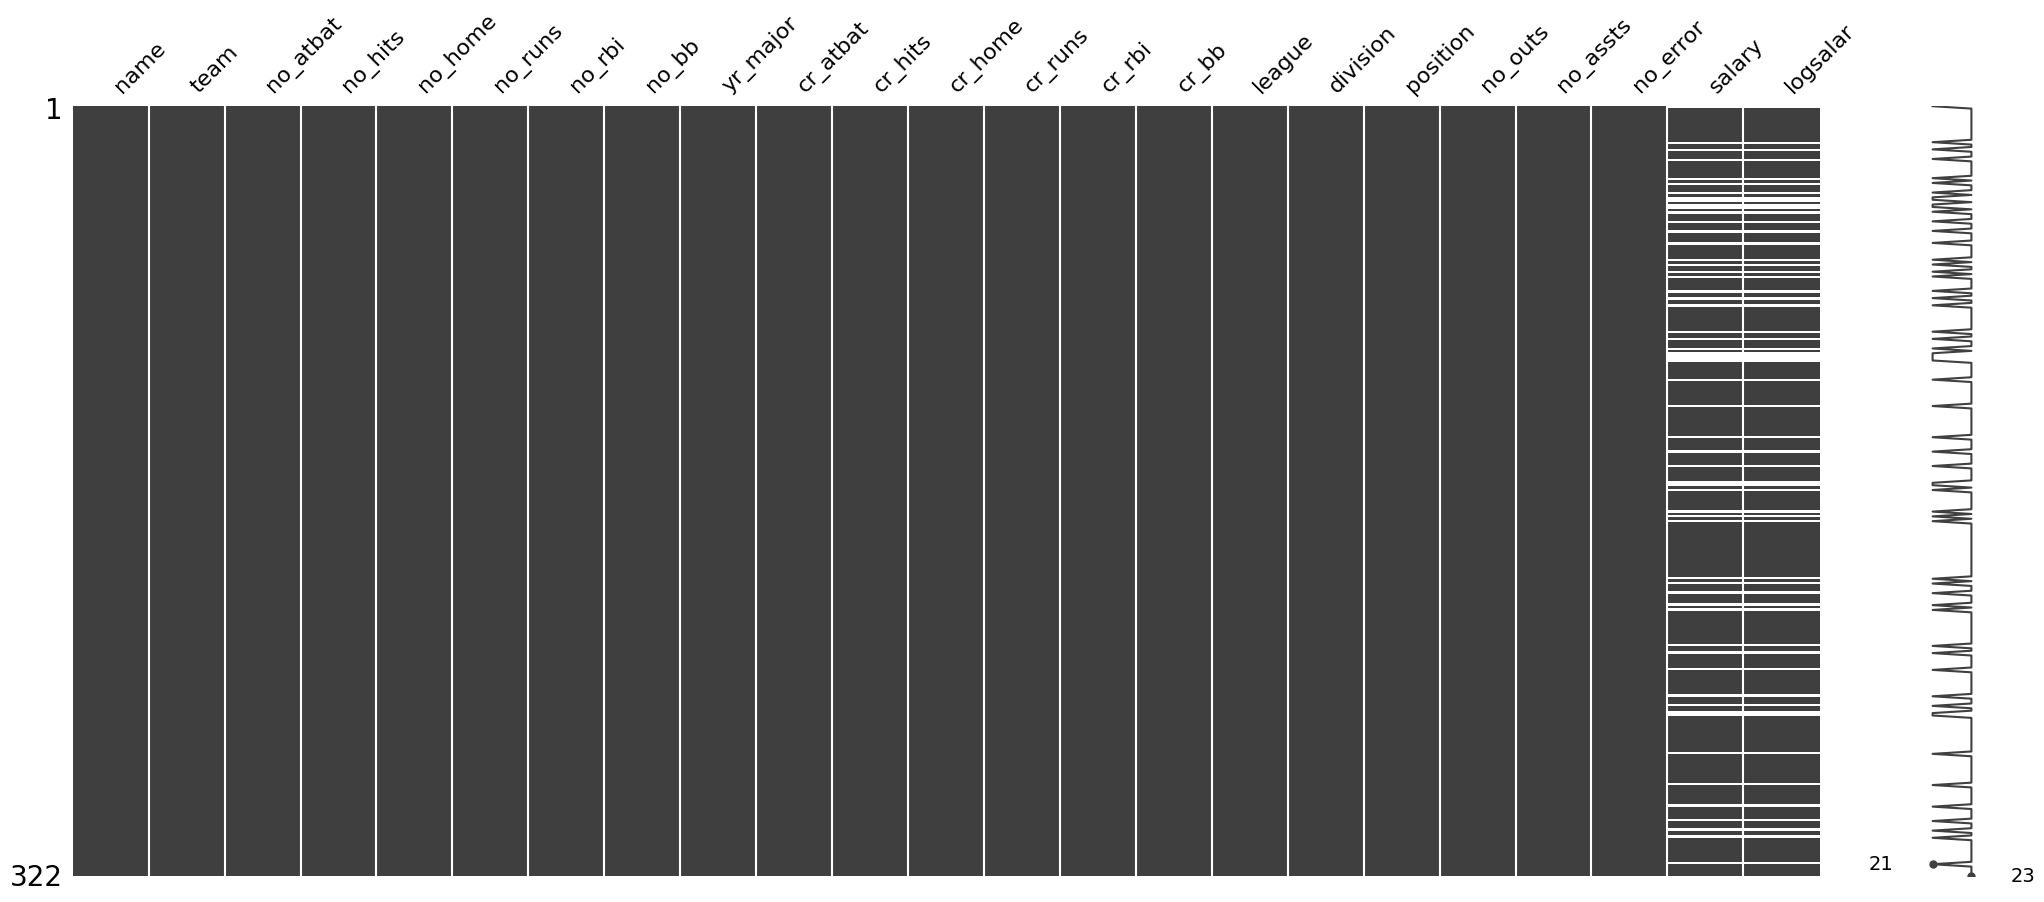

In [34]:
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'png'

msno.matrix(df)
plt.show()

In [ ]:
import seaborn as sns
%config InlineBackend.figure_format = 'svg'

df_correlation = housing
df_columns = list(housing.columns)
plt.figure(figsize=(12,6))
g = sns.heatmap(df_correlation[df_columns].corr(),
                annot=True, 
                cmap = "coolwarm")